#### This notebook was created for the 3rd step in the [Manning LiveProject Getting started with Jupyter Notebooks](https://liveproject.manning.com/module/280_4_1/getting-started-with-jupyter-notebook/)

In [1]:
import numpy as np

In [2]:
def createDataSet():
    """A simple function that creates the initial dataset"""
    dataset = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ["A", "A", "B", "B"]
    return dataset, labels

In [3]:
dataset, labels = createDataSet()

In [4]:
def KNN_classifier(inputsequence, dataset, labels, k_neighbors):
    """The classifier using the euclidean distance - sqr root of the squared sum of coordinate differences,
    that is, sqr root of the sum of the squared coordinate differences"""
    dset_size = dataset.shape[0]
    # First we create a tiled matrix from the inputsequence and we compute the difference matrix
    diff_matrix = np.tile(inputsequence, [dset_size, 1]) - dataset
    # We square the difference matrices so that the values dont cancel eachother when summed
    squared_diff_matrix = diff_matrix ** 2
    # We calculate the squared distances by summing the squared differences
    squared_distances = squared_diff_matrix.sum(axis=1)
    # We take the sqrt of squared distances to figure the actual distances
    distances = squared_distances ** 0.5
    # We sort the distance and return the shortest one
    sorted_distances_indexes = distances.argsort()
    class_count = {}
    for i in range(k_neighbors):
        current_vote_label = labels[sorted_distances_indexes[i]]
        class_count[current_vote_label] = class_count.get(current_vote_label, 0) + 1
    sorted_class_count = sorted(
        class_count.items(), key=(lambda item: item[1]), reverse=True
    )
    return sorted_class_count[0][0]

In [5]:
KNN_classifier([0, 0], dataset, labels, 3)

'B'

In [8]:
KNN_classifier([1, 1], dataset, labels, 3)

'A'

#### Euclidean distance formula

$$ d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

In [25]:
def createDataSetforplotting():
    """A simple function that creates the initial dataset"""
    dataset = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ["A1", "A2", "B1", "B2"]
    return dataset, labels

In [26]:
dataset, labels = createDataSetforplotting()

In [27]:
labeled_data = dict(zip(labels, dataset))

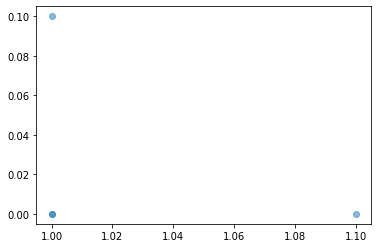

In [30]:
import numpy as np
import matplotlib.pyplot as plt

x = [labeled_data["A1"], labeled_data["A2"]]
y = [labeled_data["B1"], labeled_data["B2"]]
plt.scatter(x, y, alpha=0.5)
plt.show()

In [31]:
labeled_data

{'A1': array([1. , 1.1]),
 'A2': array([1., 1.]),
 'B1': array([0., 0.]),
 'B2': array([0. , 0.1])}